In [1]:
import sys

In [2]:
sys.path.append("../../")
sys.path.append("../")
sys.path.append('/Users/evgenia_k/Desktop/Y_Data/CitrusX_prj_New/xai-compare')

In [3]:
from sklearn.model_selection import train_test_split

# custom modules
from mlops_prj_ydata.dataset import german_credit_data, bank_marketing
from models.models import XGBClassifierWrapper, XGBClassifierWrapperSimple

from xai_compare.comparison import FeatureElimination

import warnings
warnings.filterwarnings("ignore") 

2024-07-18 19:47:30.232 | INFO     | mlops_prj_ydata.config:<module>:11 - PROJ_ROOT path is: /Users/evgenia_k/Desktop/Y_Data/MLOps-prj-YData
Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


<h3>The bank marketing dataset</h3>

In [4]:
# get the data
X, y = bank_marketing()

# split into test and train
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)

In [5]:
# create and fit the model
model = XGBClassifierWrapperSimple()
model.fit(X_train_clean, y_train_clean)

# evaluate the model
model.evaluate(X_test_clean, y_test_clean)

Accuracy: 0.89
ROC AUC: 0.66
F1: 0.43


Explainers:   0%|          | 0/2 [00:00<?, ?it/s]


 SHAP explanation created
Iteration: 1, Removed: poutcome_unknown

 SHAP explanation created
Iteration: 2, Removed: job_unknown

 SHAP explanation created
Iteration: 3, Removed: loan_yes

 SHAP explanation created
Iteration: 4, Removed: job_unemployed

 SHAP explanation created
Iteration: 5, Removed: housing_yes

 SHAP explanation created
Iteration: 6, Removed: default_no

 SHAP explanation created
Iteration: 7, Removed: job_services

 SHAP explanation created
Iteration: 8, Removed: default_yes

 SHAP explanation created
Iteration: 9, Removed: month_dec

 SHAP explanation created
Iteration: 10, Removed: education_unknown

 SHAP explanation created
Iteration: 11, Removed: job_entrepreneur

 SHAP explanation created
Iteration: 12, Removed: job_housemaid

 SHAP explanation created
Iteration: 13, Removed: education_primary

 SHAP explanation created
Iteration: 14, Removed: job_self-employed

 SHAP explanation created
Iteration: 15, Removed: poutcome_failure

 SHAP explanation created
Iter

Explainers:  50%|█████     | 1/2 [00:12<00:12, 12.46s/it]


 SHAP explanation created
Iteration: 21, Removed: month_apr

 permutations explanation created
Iteration: 1, Removed: education_unknown

 permutations explanation created
Iteration: 2, Removed: poutcome_unknown

 permutations explanation created
Iteration: 3, Removed: marital_single

 permutations explanation created
Iteration: 4, Removed: housing_yes

 permutations explanation created
Iteration: 5, Removed: loan_yes

 permutations explanation created
Iteration: 6, Removed: job_unemployed

 permutations explanation created
Iteration: 7, Removed: job_housemaid

 permutations explanation created
Iteration: 8, Removed: job_self-employed

 permutations explanation created
Iteration: 9, Removed: default_no

 permutations explanation created
Iteration: 10, Removed: job_entrepreneur

 permutations explanation created
Iteration: 11, Removed: default_yes

 permutations explanation created
Iteration: 12, Removed: contact_cellular

 permutations explanation created
Iteration: 13, Removed: educat

Explainers: 100%|██████████| 2/2 [01:13<00:00, 36.69s/it]


 permutations explanation created
Iteration: 21, Removed: marital_divorced
SHAP


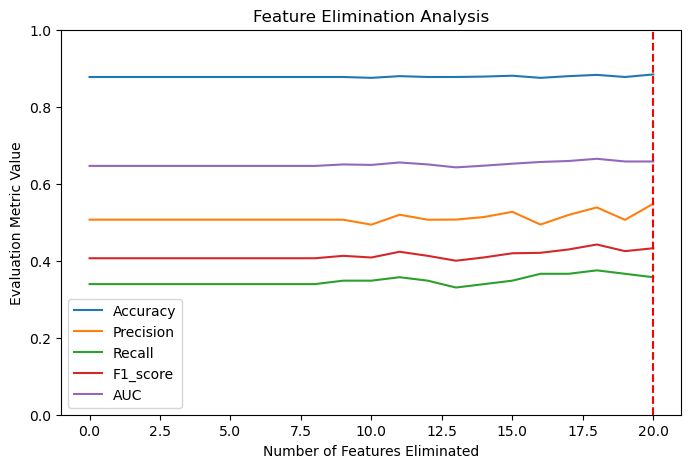

20 features are suggested to be removed
           train       val      test
Accuracy     1.0  0.883850  0.911602
Precision    1.0  0.547945  0.547945
Recall       1.0  0.357143  0.459770
F1_score     1.0  0.432432  0.500000
AUC          1.0  0.657738  0.709714

PERMUTATIONS


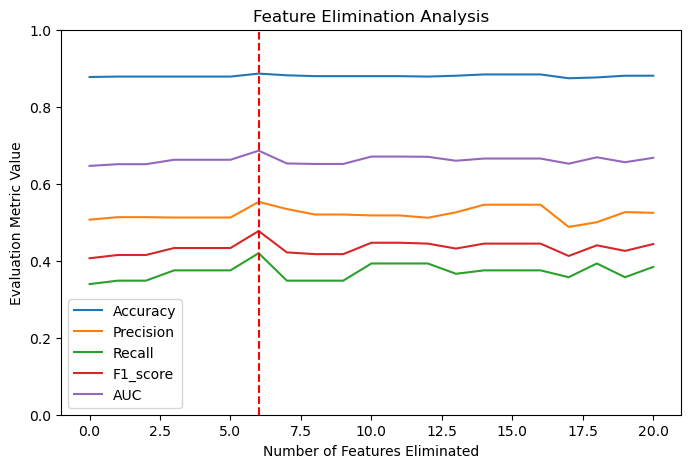

6 features are suggested to be removed
           train       val      test
Accuracy     1.0  0.886062  0.909392
Precision    1.0  0.552941  0.534247
Recall       1.0  0.419643  0.448276
F1_score     1.0  0.477157  0.487500
AUC          1.0  0.685832  0.703356



Accuracy    0.9116
dtype: float64

In [6]:
params = {'model': model,
          'data': X,
          'target': y,
          'custom_explainer':None,
          'mode': 'classification',
          'metric': 'Accuracy',
          'default_explainers': ['shap', 'permutations'],
          'verbose': True,
          'random_state': 2,
          'threshold': 0.6}

feature_elim = FeatureElimination(**params)

feature_elim.best_result()

<h3>German credit risk dataset</h3>

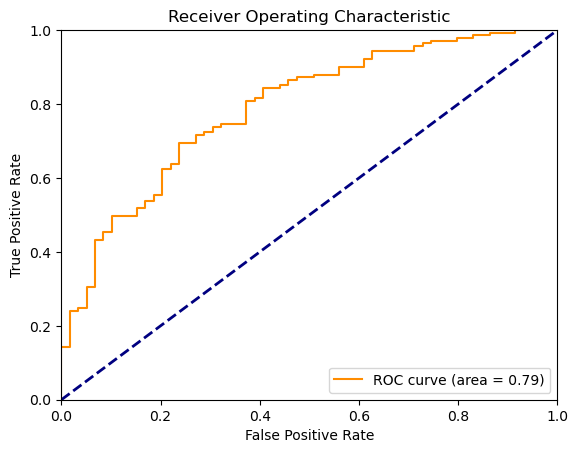

In [7]:
# get the data
X, y = german_credit_data()

# split into test and train
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X,y,test_size=0.2, random_state=1)

# create and fit the model
model = XGBClassifierWrapper()
model.fit(X_train_clean, y_train_clean, X_test_clean, y_test_clean)

# evaluate the model
model.evaluate(X_test_clean, y_test_clean)



Explainers:   0%|          | 0/2 [00:00<?, ?it/s]


 SHAP explanation created
Iteration: 1, Removed: foreignworker_A202

 SHAP explanation created
Iteration: 2, Removed: foreignworker_A201

 SHAP explanation created
Iteration: 3, Removed: purpose_A44

 SHAP explanation created
Iteration: 4, Removed: purpose_A410

 SHAP explanation created
Iteration: 5, Removed: purpose_A46

 SHAP explanation created
Iteration: 6, Removed: purpose_A48

 SHAP explanation created
Iteration: 7, Removed: savings_A63

 SHAP explanation created
Iteration: 8, Removed: job_A171

 SHAP explanation created
Iteration: 9, Removed: purpose_A45

 SHAP explanation created
Iteration: 10, Removed: employmentsince_A75

 SHAP explanation created
Iteration: 11, Removed: telephone_A192

 SHAP explanation created
Iteration: 12, Removed: otherinstallmentplans_A142

 SHAP explanation created
Iteration: 13, Removed: purpose_A42

 SHAP explanation created
Iteration: 14, Removed: credithistory_A31

 SHAP explanation created
Iteration: 15, Removed: existingchecking_A13

 SHAP expl

Explainers:  50%|█████     | 1/2 [01:35<01:35, 95.18s/it]


 SHAP explanation created
Iteration: 25, Removed: credithistory_A32

 permutations explanation created
Iteration: 1, Removed: foreignworker_A202

 permutations explanation created
Iteration: 2, Removed: foreignworker_A201

 permutations explanation created
Iteration: 3, Removed: purpose_A44

 permutations explanation created
Iteration: 4, Removed: savings_A64

 permutations explanation created
Iteration: 5, Removed: purpose_A45

 permutations explanation created
Iteration: 6, Removed: purpose_A46

 permutations explanation created
Iteration: 7, Removed: employmentsince_A71

 permutations explanation created
Iteration: 8, Removed: otherinstallmentplans_A142

 permutations explanation created
Iteration: 9, Removed: statussex_A91

 permutations explanation created
Iteration: 10, Removed: savings_A63

 permutations explanation created
Iteration: 11, Removed: job_A171

 permutations explanation created
Iteration: 12, Removed: purpose_A48

 permutations explanation created
Iteration: 13, Re

Explainers: 100%|██████████| 2/2 [04:07<00:00, 123.53s/it]


 permutations explanation created
Iteration: 25, Removed: telephone_A192
SHAP


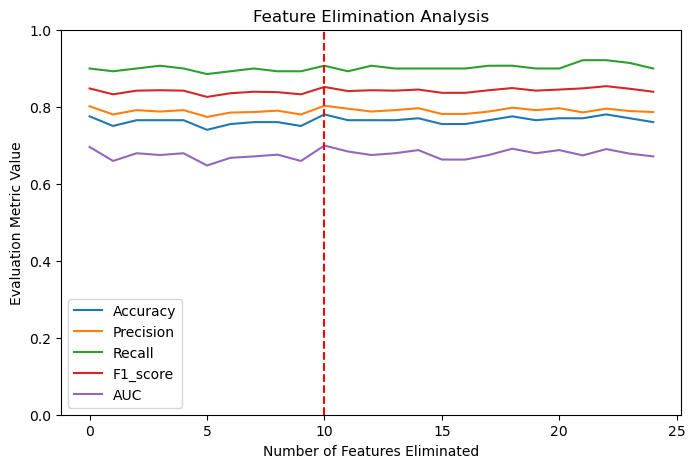

10 features are suggested to be removed
              train       val      test
Accuracy   0.968333  0.780000  0.715000
Precision  0.960465  0.802548  0.787097
Recall     0.995181  0.906475  0.835616
F1_score   0.977515  0.851351  0.810631
AUC        0.951644  0.699139  0.612253

PERMUTATIONS


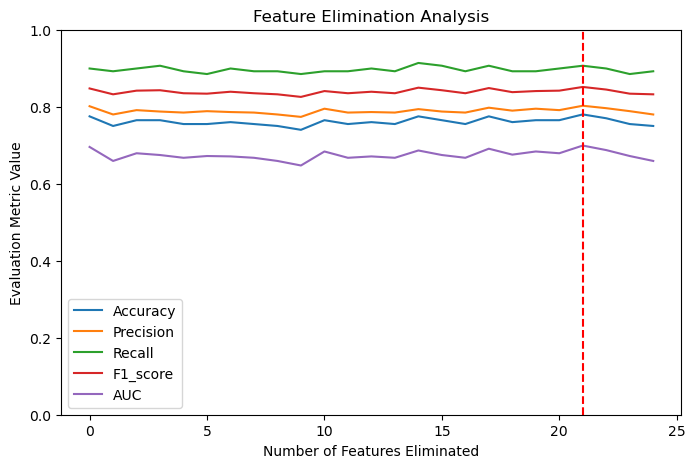

21 features are suggested to be removed
              train       val      test
Accuracy   0.970000  0.780000  0.715000
Precision  0.962704  0.802548  0.790850
Recall     0.995181  0.906475  0.828767
F1_score   0.978673  0.851351  0.809365
AUC        0.954347  0.699139  0.618087



AUC    0.6181
dtype: float64

In [8]:
params = {'model': model,
          'data': X,
          'target': y,
          'custom_explainer':None,
          'mode': 'classification',
          'metric': 'AUC',
          'default_explainers': ['shap', 'permutations'],
          'verbose': True,
          'random_state': 1,
          'threshold': 0.6}

feature_elim = FeatureElimination(**params)

feature_elim.best_result()